### Область работы 1 (библиотеки)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy. stats import boxcox 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler, Normalizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss

### Область работы 2 (поиск  модели .... )

In [3]:
path_train = 'train.csv'

In [4]:
train=pd.read_csv(path_train)

In [5]:
test=pd.read_csv('test.csv')
test

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14
0,1.0,22.00,0.790,2.0,9.0,4.0,0.290,0.0,1.0,1.0,0.0,2.0,420.0,284.0
1,1.0,31.57,4.000,2.0,14.0,4.0,5.000,1.0,1.0,3.0,1.0,2.0,290.0,2280.0
2,1.0,35.58,0.750,2.0,4.0,4.0,1.500,0.0,0.0,0.0,1.0,2.0,231.0,1.0
3,1.0,41.17,1.335,2.0,2.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,168.0,1.0
4,1.0,21.17,0.875,1.0,8.0,8.0,0.250,0.0,0.0,0.0,0.0,2.0,280.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1.0,17.08,0.085,1.0,8.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,140.0,723.0
100,0.0,33.67,0.375,2.0,13.0,4.0,0.375,0.0,0.0,0.0,0.0,2.0,300.0,45.0
101,1.0,18.08,5.500,2.0,4.0,4.0,0.500,1.0,0.0,0.0,0.0,2.0,80.0,1.0
102,0.0,31.57,1.500,2.0,1.0,1.0,0.000,0.0,1.0,2.0,1.0,2.0,200.0,106.0


In [6]:
train

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
0,1.0,28.00,2.000,2.0,4.0,8.0,4.165,1.0,1.0,2.0,1.0,2.0,181.0,1.0,1.0
1,1.0,36.25,5.000,2.0,8.0,5.0,2.500,1.0,1.0,6.0,0.0,2.0,0.0,368.0,1.0
2,0.0,29.50,2.000,1.0,10.0,8.0,2.000,0.0,0.0,0.0,0.0,2.0,256.0,18.0,0.0
3,1.0,22.67,0.165,2.0,8.0,3.0,2.250,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
4,0.0,25.75,0.500,2.0,8.0,8.0,0.875,1.0,0.0,0.0,1.0,2.0,491.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,1.0,28.75,1.165,2.0,4.0,4.0,0.500,1.0,0.0,0.0,0.0,1.0,280.0,1.0,0.0
582,1.0,44.83,7.000,1.0,8.0,4.0,1.625,0.0,0.0,0.0,0.0,2.0,160.0,3.0,0.0
583,1.0,21.33,7.500,2.0,6.0,4.0,1.415,1.0,1.0,1.0,0.0,2.0,80.0,9801.0,1.0
584,0.0,53.33,0.165,2.0,1.0,1.0,0.000,0.0,0.0,0.0,1.0,1.0,62.0,28.0,0.0


In [7]:
train['C5_enc'].unique()

array([ 4.,  8., 10., 13., 11.,  3., 14.,  6.,  9., 12.,  7.,  5.,  1.,
        2.])

In [8]:
num_features=['N2','N3','N7','N10','N13','N14']
axis_features=['C4_enc','C5_enc','C12_enc']
cat_features=['C1','C8','C9','C11']

In [9]:
train.isna().sum()

C1         0
N2         0
N3         0
C4_enc     0
C5_enc     0
C6_enc     0
N7         0
C8         0
C9         0
N10        0
C11        0
C12_enc    0
N13        0
N14        0
Target     0
dtype: int64

In [10]:
train.describe()

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,0.679181,31.718737,4.818660,1.771331,7.354949,4.742321,2.342773,0.530717,0.436860,2.498294,0.462457,1.928328,182.001706,972.648464,0.445392
std,0.467190,11.903846,4.973202,0.428391,3.675786,2.006864,3.505711,0.499482,0.496421,4.994441,0.499015,0.306594,174.576425,5156.884823,0.497434
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.830000,1.085000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.000000,0.000000,2.000000,73.500000,1.000000,0.000000
50%,1.000000,28.920000,3.000000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,160.000000,5.000000,0.000000
75%,1.000000,38.065000,7.070000,2.000000,10.000000,5.000000,3.000000,1.000000,1.000000,3.000000,1.000000,2.000000,266.750000,434.000000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.000000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [11]:
train.Target.value_counts()

0.0    325
1.0    261
Name: Target, dtype: int64

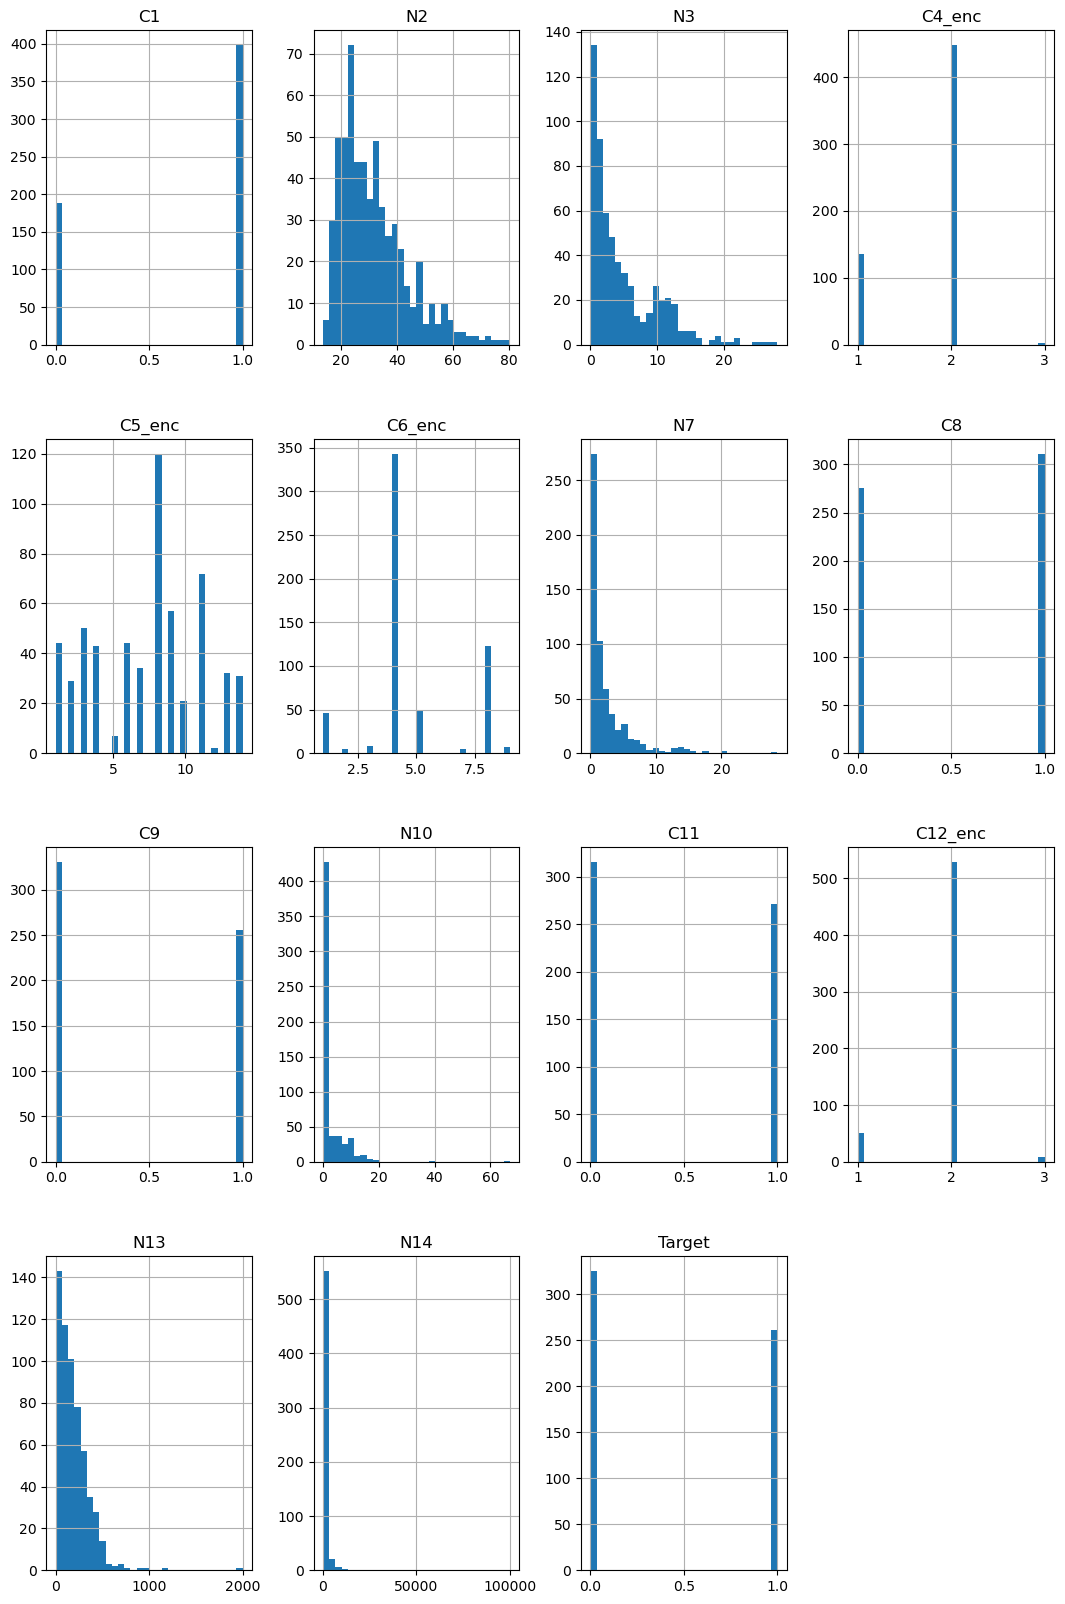

In [12]:
train.hist(bins=30, figsize=(13, 20))
plt.show()

In [13]:
train.duplicated().sum()

0

In [14]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Target',axis=1),train.Target , test_size = 0.2,shuffle = True,stratify=train.Target,random_state=42)

In [17]:
pipe_bayes = Pipeline([('preprocessing', StandardScaler()),
                       ('classifier', GaussianNB())])

param_bayes = [{'preprocessing': [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()]} ]

cv = StratifiedShuffleSplit(n_splits = 7, test_size = 0.2)

grid_bayes = GridSearchCV(pipe_bayes, param_bayes, cv = 5, scoring = 'f1', return_train_score = True, n_jobs = -1)
grid_bayes.fit(X_train, y_train);

In [18]:
drop = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params']

rename = {'param_preprocessing': 'preprocessing'}

results_bayes = pd.DataFrame(grid_bayes.cv_results_).sort_values(['rank_test_score', 'std_test_score'])

display(results_bayes.drop(columns = drop).rename(columns = rename).T)
grid_bayes.best_params_

,0,1,2,3
preprocessing,StandardScaler(),MinMaxScaler(),RobustScaler(),Normalizer()
split0_test_score,0.775,0.775,0.775,0.327273
split1_test_score,0.727273,0.727273,0.727273,0.419355
split2_test_score,0.72973,0.72973,0.72973,0.307692
split3_test_score,0.777778,0.777778,0.777778,0.290909
split4_test_score,0.831169,0.831169,0.831169,0.315789
mean_test_score,0.76819,0.76819,0.76819,0.332204
std_test_score,0.0381,0.0381,0.0381,0.045156
rank_test_score,1,1,1,4
split0_train_score,0.761905,0.761905,0.761905,0.345133


{'preprocessing': StandardScaler()}

In [19]:
pipe_bayes = make_pipeline(StandardScaler(), GaussianNB())
pipe_bayes.fit(X_train, y_train)
y_pred=pipe_bayes.predict(X_test)
print(f1_score(y_test,y_pred))
print(classification_report(y_test, pipe_bayes.predict(X_test), digits = 3))

0.6888888888888889
              precision    recall  f1-score   support

         0.0      0.728     0.908     0.808        65
         1.0      0.838     0.585     0.689        53

    accuracy                          0.763       118
   macro avg      0.783     0.746     0.749       118
weighted avg      0.778     0.763     0.755       118



In [20]:
#KNN
pipe_knn = Pipeline([('preprocessing', StandardScaler()), 
                     ('classifier', KNeighborsClassifier())])

param_knn = [{'preprocessing': [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()],
              'classifier__n_neighbors': np.arange(1, 200, 5),
              'classifier__p': np.arange(1, 32, 5),
              'classifier__weights': ['uniform', 'distance'] }]

cv = StratifiedShuffleSplit(n_splits = 7, test_size = 0.2, random_state = 100)
grid_knn = GridSearchCV(pipe_knn, param_knn, cv = cv, scoring = 'f1', return_train_score = True, n_jobs = -1)
grid_knn.fit(X_train, y_train)
grid_knn.best_params_

{'classifier__n_neighbors': 96,
 'classifier__p': 6,
 'classifier__weights': 'uniform',
 'preprocessing': MinMaxScaler()}

In [315]:
results_knn = pd.DataFrame(grid_knn.cv_results_).sort_values(['rank_test_score', 'std_test_score'])
results_knn[results_knn['param_classifier__weights']!='distance'].T

,225,169,2065,2057,113,905,2049,1553,2113,257,...,2218,2219,2224,2225,2226,2227,2232,2233,2234,2235
mean_fit_time,0.012574,0.011429,0.010515,0.008,0.022863,0.010452,0.009143,0.009145,0.012574,0.01143,...,0.015031,0.008593,0.00766,0.009598,0.01474,0.008469,0.00723,0.009349,0.014387,0.008385
std_fit_time,0.00396,0.003958,0.003999,0.000002,0.022802,0.003531,0.002798,0.002799,0.003959,0.008398,...,0.00354,0.003123,0.002377,0.00274,0.003202,0.003584,0.002874,0.004292,0.003592,0.000228
mean_score_time,0.031381,0.035433,0.053149,0.050293,0.036573,0.057303,0.051435,0.05715,0.05372,0.050545,...,0.012865,0.013899,0.013005,0.012232,0.011572,0.014818,0.011138,0.011742,0.007465,0.009411
std_score_time,0.008095,0.01035,0.008055,0.003616,0.018073,0.005999,0.003958,0.007919,0.003612,0.011597,...,0.00258,0.002697,0.00299,0.004104,0.002921,0.003593,0.00348,0.003249,0.002872,0.002931
param_classifier__n_neighbors,21,16,181,181,11,81,181,136,186,21,...,196,196,196,196,196,196,196,196,196,196
param_classifier__p,1,1,31,26,1,6,21,26,26,21,...,21,21,26,26,26,26,31,31,31,31
param_classifier__weights,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),...,RobustScaler(),Normalizer(),StandardScaler(),MinMaxScaler(),RobustScaler(),Normalizer(),StandardScaler(),MinMaxScaler(),RobustScaler(),Normalizer()
params,"{'classifier__n_neighbors': 21, 'classifier__p...","{'classifier__n_neighbors': 16, 'classifier__p...","{'classifier__n_neighbors': 181, 'classifier__...","{'classifier__n_neighbors': 181, 'classifier__...","{'classifier__n_neighbors': 11, 'classifier__p...","{'classifier__n_neighbors': 81, 'classifier__p...","{'classifier__n_neighbors': 181, 'classifier__...","{'classifier__n_neighbors': 136, 'classifier__...","{'classifier__n_neighbors': 186, 'classifier__...","{'classifier__n_neighbors': 21, 'classifier__p...",...,"{'classifier__n_neighbors': 196, 'classifier__...","{'classifier__n_neighbors': 196, 'classifier__...","{'classifier__n_neighbors': 196, 'classifier__...","{'classifier__n_neighbors': 196, 'classifier__...","{'classifier__n_neighbors': 196, 'classifier__...","{'classifier__n_neighbors': 196, 'classifier__...","{'classifier__n_neighbors': 196, 'classifier__...","{'classifier__n_neighbors': 196, 'classifier__...","{'classifier__n_neighbors': 196, 'classifier__...","{'classifier__n_neighbors': 196, 'classifier__..."
split0_test_score,0.790123,0.780488,0.809524,0.795181,0.785714,0.790123,0.795181,0.829268,0.780488,0.790698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
pipe_knn= make_pipeline(MinMaxScaler(),
                           KNeighborsClassifier(n_neighbors = 21, p = 1, weights = 'uniform'))

pipe_knn.fit(X_train, y_train)

print(classification_report(y_test, pipe_knn.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86        65
         1.0       0.81      0.87      0.84        53

    accuracy                           0.85       118
   macro avg       0.85      0.85      0.85       118
weighted avg       0.85      0.85      0.85       118



In [62]:
#LOGREG
pipe_logreg = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier',           LogisticRegression(max_iter=4000))])
param_logreg = [{'preprocessing': [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()],
                 'classifier__penalty': [None],
                 'classifier__solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']},
    
                {'preprocessing': [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()],
                 'classifier__penalty': ['l1'],
                 'classifier__solver': ['liblinear', 'saga']},
              
                {'preprocessing': [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()],
                 'classifier__penalty': ['l2'],
                 'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']},
               
                {'preprocessing': [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()],
                 'classifier__penalty': ['elasticnet'],
                 'classifier__solver': ['saga'],
                 'classifier__l1_ratio': np.arange(0, 1, 0.01)} ]

cv = StratifiedShuffleSplit(n_splits = 7, test_size = 0.2)
grid_logreg = GridSearchCV(pipe_logreg, param_logreg, cv = cv, scoring = 'f1', return_train_score = True, n_jobs = -1)
grid_logreg.fit(X_train, y_train)
results_logreg = pd.DataFrame(grid_logreg.cv_results_).sort_values(['rank_test_score', 'std_test_score'])
results_logreg.T

,24,292,296,300,304,308,312,316,320,324,...,283,287,291,295,299,303,307,311,315,319
mean_fit_time,0.209047,0.144271,0.159039,0.132501,0.138107,0.157749,0.154464,0.152319,0.138763,0.129172,...,0.014374,0.011162,0.019717,0.013903,0.017789,0.017289,0.017574,0.016575,0.019147,0.016806
std_fit_time,0.021985,0.033455,0.035084,0.020565,0.013404,0.016803,0.024123,0.028531,0.014969,0.014069,...,0.00414,0.00706,0.00735,0.010928,0.006125,0.001979,0.005731,0.005553,0.009127,0.004783
mean_score_time,0.00743,0.011283,0.011387,0.00879,0.006005,0.009288,0.006146,0.005573,0.005429,0.005573,...,0.004358,0.012382,0.002325,0.007411,0.006215,0.007144,0.006573,0.005287,0.006144,0.005788
std_score_time,0.00354,0.006696,0.01424,0.006401,0.000752,0.006476,0.00064,0.000729,0.000495,0.000729,...,0.001912,0.013191,0.005434,0.0073,0.000512,0.001246,0.00226,0.000452,0.000833,0.000363
param_classifier__penalty,l1,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,...,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet
param_classifier__solver,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,...,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga
param_preprocessing,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),...,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
param_classifier__l1_ratio,NaN,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,...,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66
params,"{'classifier__penalty': 'l1', 'classifier__sol...","{'classifier__l1_ratio': 0.6, 'classifier__pen...","{'classifier__l1_ratio': 0.61, 'classifier__pe...","{'classifier__l1_ratio': 0.62, 'classifier__pe...","{'classifier__l1_ratio': 0.63, 'classifier__pe...","{'classifier__l1_ratio': 0.64, 'classifier__pe...","{'classifier__l1_ratio': 0.65, 'classifier__pe...","{'classifier__l1_ratio': 0.66, 'classifier__pe...","{'classifier__l1_ratio': 0.67, 'classifier__pe...","{'classifier__l1_ratio': 0.68, 'classifier__pe...",...,"{'classifier__l1_ratio': 0.5700000000000001, '...","{'classifier__l1_ratio': 0.58, 'classifier__pe...","{'classifier__l1_ratio': 0.59, 'classifier__pe...","{'classifier__l1_ratio': 0.6, 'classifier__pen...","{'classifier__l1_ratio': 0.61, 'classifier__pe...","{'classifier__l1_ratio': 0.62, 'classifier__pe...","{'classifier__l1_ratio': 0.63, 'classifier__pe...","{'classifier__l1_ratio': 0.64, 'classifier__pe...","{'classifier__l1_ratio': 0.65, 'classifier__pe...","{'classifier__l1_ratio': 0.66, 'classifier__pe..."
split0_test_score,0.843373,0.843373,0.843373,0.843373,0.843373,0.843373,0.843373,0.843373,0.843373,0.843373,...,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286


In [64]:
pipe_logreg1 = make_pipeline(StandardScaler(),
                             LogisticRegression(penalty = 'elasticnet', solver = 'saga',l1_ratio=0.6,
                                                max_iter = 4000))

pipe_logreg2 = make_pipeline(StandardScaler(),
                             LogisticRegression(penalty = 'l1',  solver = 'saga',
                                                max_iter = 4000))

pipe_logreg1.fit(X_train, y_train)
pipe_logreg2.fit(X_train, y_train)

print(classification_report(y_test, pipe_logreg1.predict(X_test)))
print(classification_report(y_test, pipe_logreg2.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85        65
         1.0       0.79      0.87      0.83        53

    accuracy                           0.84       118
   macro avg       0.84      0.84      0.84       118
weighted avg       0.84      0.84      0.84       118

              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85        65
         1.0       0.79      0.87      0.83        53

    accuracy                           0.84       118
   macro avg       0.84      0.84      0.84       118
weighted avg       0.84      0.84      0.84       118



In [65]:
n = np.linspace(0.0001, 6, 500) 

pipe_logreg = make_pipeline(StandardScaler(),
                            LogisticRegression(penalty = 'l1', solver = 'saga',
                                               max_iter = 4000))

cv = StratifiedShuffleSplit(n_splits = 7, test_size = 0.2)

train_scores, test_scores = validation_curve(pipe_logreg, X_train, y_train,
                                             param_name = 'logisticregression__C',
                                             param_range = n,
                                             cv = cv,
                                             scoring = 'f1',
                                             n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

максимум в точке 0.40891


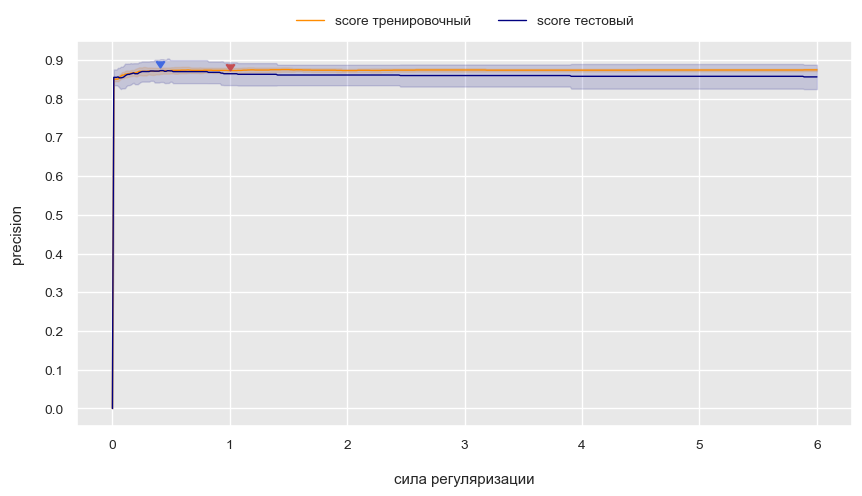

In [66]:
sns.set_theme(font_scale = 0.9)
sns.set_style('darkgrid', {'axes.facecolor': '.91'})

plt.subplots(figsize = (10, 5), subplot_kw = dict(yticks = np.arange(0, 1, 0.1)))

sns.lineplot(y = train_mean, x = n, label = "score тренировочный", legend = False, color = 'darkorange', linewidth = 1)
plt.fill_between(n, train_mean - train_std, train_mean + train_std, color = 'darkorange', alpha = 0.15)

sns.lineplot(y = test_mean, x = n, label = "score тестовый", legend = False, color = 'navy', linewidth = 1)
plt.fill_between(n, test_mean - test_std, test_mean + test_std, color = 'navy', alpha = 0.15)

plt.scatter(n[test_mean.argmax()], test_mean.max() + 0.01, c = 'royalblue', marker = 7, zorder = 2)
plt.scatter(1, test_mean[np.abs(n-1).argmin()] + 0.01, c = 'r', marker = 7, zorder = 2)

plt.legend(ncol = 2, loc = 'upper center', bbox_to_anchor = (0, 0, 1, 1.1), framealpha = 0)

plt.xlabel("сила регуляризации", labelpad = 15)
plt.ylabel("precision", labelpad = 15);

print(f"максимум в точке {n[test_mean.argmax()]:.5f}")

In [67]:
pipe_logreg = make_pipeline(MinMaxScaler(),
                            LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.40891,
                                               max_iter = 4000))

pipe_logreg.fit(X_train, y_train)

print(classification_report(y_test, pipe_logreg.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.74      0.83        65
         1.0       0.75      0.96      0.84        53

    accuracy                           0.84       118
   macro avg       0.85      0.85      0.84       118
weighted avg       0.87      0.84      0.84       118



In [59]:
#DT
pipe_knn = Pipeline([ ('classifier', DecisionTreeClassifier())])

param_knn = [{'classifier__max_depth': np.arange(1, 50),
              'classifier__min_samples_leaf': np.arange(1, 32),
              'classifier__criterion': ["gini", "entropy", "log_loss"] }]

cv = StratifiedShuffleSplit(n_splits = 7, test_size = 0.2, random_state = 100)
grid_knn = GridSearchCV(pipe_knn, param_knn, cv = cv, scoring = 'f1', return_train_score = True, n_jobs = -1)
grid_knn.fit(X_train, y_train)
grid_knn.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 1,
 'classifier__min_samples_leaf': 1}

In [60]:
results_knn = pd.DataFrame(grid_knn.cv_results_).sort_values(['rank_test_score', 'std_test_score'])
results_knn.T

,0,1,2,3,4,5,6,7,8,9,...,559,1427,590,776,683,404,869,931,1365,1148
mean_fit_time,0.004098,0.00536,0.003714,0.004859,0.005574,0.006145,0.006005,0.005435,0.005043,0.005145,...,0.008287,0.011164,0.012594,0.007918,0.014004,0.008573,0.009792,0.008715,0.012743,0.005286
std_fit_time,0.000731,0.000591,0.000878,0.000351,0.000729,0.00035,0.001072,0.001299,0.00115,0.001125,...,0.000452,0.007061,0.005466,0.003366,0.008554,0.000493,0.002996,0.000452,0.010161,0.00459
mean_score_time,0.004314,0.004001,0.004002,0.005429,0.006146,0.006719,0.007438,0.006186,0.005824,0.006145,...,0.008003,0.004464,0.007716,0.009731,0.007716,0.01143,0.010662,0.007143,0.008851,0.008896
std_score_time,0.00113,0.000536,0.000535,0.000904,0.000835,0.000886,0.000503,0.001386,0.001598,0.001246,...,0.000002,0.007059,0.001386,0.005984,0.000451,0.0063,0.004937,0.000349,0.006525,0.005039
param_classifier__criterion,gini,gini,gini,gini,gini,gini,gini,gini,gini,gini,...,gini,gini,gini,gini,gini,gini,gini,gini,gini,gini
param_classifier__max_depth,1,1,1,1,1,1,1,1,1,1,...,19,47,20,26,23,14,29,31,45,38
param_classifier__min_samples_leaf,1,2,3,4,5,6,7,8,9,10,...,2,2,2,2,2,2,2,2,2,2
params,"{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...",...,"{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_..."
split0_test_score,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,...,0.701299,0.701299,0.740741,0.666667,0.64,0.693333,0.692308,0.666667,0.725,0.666667
split1_test_score,0.869565,0.869565,0.869565,0.869565,0.869565,0.869565,0.869565,0.869565,0.869565,0.869565,...,0.795181,0.740741,0.746988,0.790123,0.775,0.740741,0.756098,0.78481,0.804878,0.740741


In [61]:
model=DecisionTreeClassifier(min_samples_leaf = 1,max_depth=1,criterion='gini')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.71      0.81        65
         1.0       0.73      0.96      0.83        53

    accuracy                           0.82       118
   macro avg       0.84      0.83      0.82       118
weighted avg       0.86      0.82      0.82       118



In [179]:
#RF
model=RandomForestClassifier(n_estimators=1400,min_samples_leaf=1,max_features='sqrt',max_depth=10,n_jobs=-1,bootstrap=True)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87        65
         1.0       0.82      0.89      0.85        53

    accuracy                           0.86       118
   macro avg       0.86      0.87      0.86       118
weighted avg       0.87      0.86      0.86       118



In [55]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['log2', 'sqrt',None]
min_samples_leaf = [0.1,1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(
    rf_clf, 
    params_grid, 
    scoring="f1", 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)

rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters: {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 4, 'n_estimators': 500}


In [175]:
results = pd.DataFrame(rf_cv.cv_results_).sort_values(['rank_test_score', 'std_test_score'])
results.T

,73,74,93,94,79,99,78,98,77,97,...,108,105,109,110,111,104,116,117,118,119
mean_fit_time,2.176917,4.29976,2.174985,4.005021,7.376546,6.213543,4.669839,4.115694,2.24449,1.980924,...,0.54334,2.841133,2.825307,5.790125,9.497772,0.574613,0.554976,2.474717,4.810323,5.741634
std_fit_time,0.245282,0.478027,0.248678,0.023108,0.946141,0.717396,0.781074,0.434688,0.245844,0.218414,...,0.039647,0.092869,0.274767,0.779828,0.919667,0.049346,0.080991,0.268988,0.182659,0.242339
mean_score_time,0.100033,0.185377,0.107927,0.17764,0.288981,0.250767,0.204985,0.185042,0.137383,0.093757,...,0.02315,0.084381,0.08542,0.15727,0.273206,0.022503,0.02033,0.096881,0.119228,0.09122
std_score_time,0.010109,0.012413,0.01376,0.006831,0.032796,0.014537,0.027691,0.01676,0.018411,0.013976,...,0.007012,0.007655,0.012567,0.01872,0.044577,0.006094,0.00299,0.022964,0.0112,0.004491
param_bootstrap,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
param_max_features,log2,log2,sqrt,sqrt,log2,sqrt,log2,sqrt,log2,sqrt,...,None,None,None,None,None,None,None,None,None,None
param_min_samples_leaf,4,4,4,4,10,10,10,10,10,10,...,2,1,2,2,2,1,10,10,10,10
param_n_estimators,500,1000,500,1000,1500,1500,1000,1000,500,500,...,100,500,500,1000,1500,100,100,500,1000,1500
params,"{'bootstrap': False, 'max_features': 'log2', '...","{'bootstrap': False, 'max_features': 'log2', '...","{'bootstrap': False, 'max_features': 'sqrt', '...","{'bootstrap': False, 'max_features': 'sqrt', '...","{'bootstrap': False, 'max_features': 'log2', '...","{'bootstrap': False, 'max_features': 'sqrt', '...","{'bootstrap': False, 'max_features': 'log2', '...","{'bootstrap': False, 'max_features': 'sqrt', '...","{'bootstrap': False, 'max_features': 'log2', '...","{'bootstrap': False, 'max_features': 'sqrt', '...",...,"{'bootstrap': False, 'max_features': None, 'mi...","{'bootstrap': False, 'max_features': None, 'mi...","{'bootstrap': False, 'max_features': None, 'mi...","{'bootstrap': False, 'max_features': None, 'mi...","{'bootstrap': False, 'max_features': None, 'mi...","{'bootstrap': False, 'max_features': None, 'mi...","{'bootstrap': False, 'max_features': None, 'mi...","{'bootstrap': False, 'max_features': None, 'mi...","{'bootstrap': False, 'max_features': None, 'mi...","{'bootstrap': False, 'max_features': None, 'mi..."
split0_test_score,0.904762,0.904762,0.904762,0.904762,0.86747,0.86747,0.86747,0.86747,0.86747,0.86747,...,0.888889,0.891566,0.888889,0.888889,0.888889,0.891566,0.837209,0.837209,0.837209,0.837209


In [58]:
model=RandomForestClassifier(n_estimators=500,min_samples_leaf=4,max_features='log2',n_jobs=-1,bootstrap=False)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87        65
         1.0       0.82      0.87      0.84        53

    accuracy                           0.86       118
   macro avg       0.85      0.86      0.86       118
weighted avg       0.86      0.86      0.86       118



SVC

In [80]:
svc_p=Pipeline([('preprocessing', StandardScaler()), 
                 ('classifier', SVC())])
param={
    'preprocessing': [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()],
    'classifier__C':list(range(1,40)),
    'classifier__kernel':['linear','rbf','poly'],
}
svc_cv = GridSearchCV(
    svc_p, 
    param, 
    scoring="f1", 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)

svc_cv.fit(X_train, y_train)
best_params = svc_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 468 candidates, totalling 2340 fits
Best parameters: {'classifier__C': 9, 'classifier__kernel': 'rbf', 'preprocessing': RobustScaler()}


In [172]:
svc_p=Pipeline([('preprocessing', RobustScaler()), 
                 ('classifier', SVC(C=9,kernel='rbf',probability=True))])
svc_p.fit(X_train,y_train)
y_pred=svc_p.predict(X_test)
f1_score(y_test,y_pred)

0.8403361344537815

In [107]:
thresholds = np.arange(0.4, 0.8, 0.01)

# Переменные для сохранения лучших значений
best_threshold = None
best_f1 = 0.0

# Цикл по значениям порога
for threshold in thresholds:
    # Обучение модели с текущим порогом
    svc_p.fit(X_train, y_train)
    
    # Получение предсказаний с текущим порогом
    y_pred = (svc_p.predict_proba(X_test)[:,1]>threshold).astype(int)
    
    # Оценка F1 Score
    current_f1 = f1_score(y_test, y_pred)
    
    # Сохранение лучших значений
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

# Вывод результатов
print(f'Best Threshold: {best_threshold}')
print(f'Best F1 Score: {best_f1}')

Best Threshold: 0.6500000000000002
Best F1 Score: 0.8648648648648648


In [171]:
svc_p=Pipeline([('preprocessing', RobustScaler()), 
                 ('classifier', SVC(C=9,kernel='rbf',probability=True))])
svc_p.fit(X_train,y_train)
y_pred=(svc_p.predict_proba(X_test)[:,1]>0.6502).astype(int)
f1_score(y_test,y_pred)

0.8648648648648648

VotingClassifier

In [88]:
from sklearn.ensemble import VotingClassifier
lr =  LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.40891,max_iter = 4000)
knn = KNeighborsClassifier(n_neighbors = 21, p = 1, weights = 'uniform')
dt = SVC(C=9,kernel='rbf')
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]
pipeline = Pipeline([('scaler', MinMaxScaler()), ('ensemble', VotingClassifier(estimators=classifiers,voting='hard'))])
vc = VotingClassifier(estimators=classifiers) 
# Fit 'vc' to the traing set and predict test set labels
pipeline.fit(X_train, y_train)   
y_pred = pipeline.predict(X_test)# Evaluate the test-set accuracy of 'vc'
f1_score(y_test, y_pred)

0.8521739130434782

GRADIENTBOOSTING

0.8363636363636363
0.8490566037735849


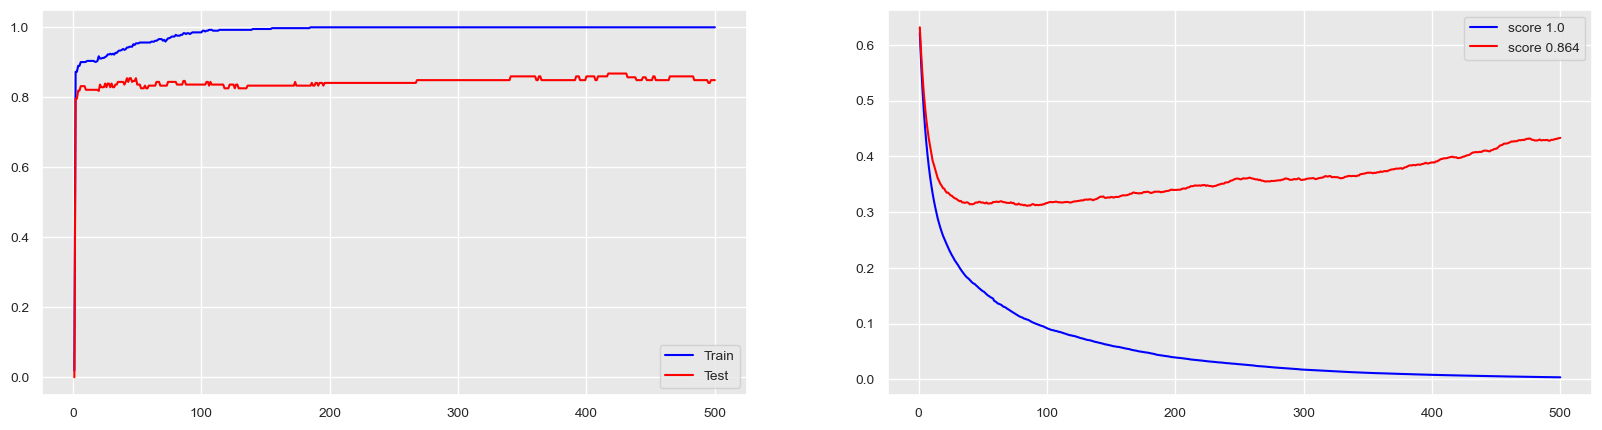

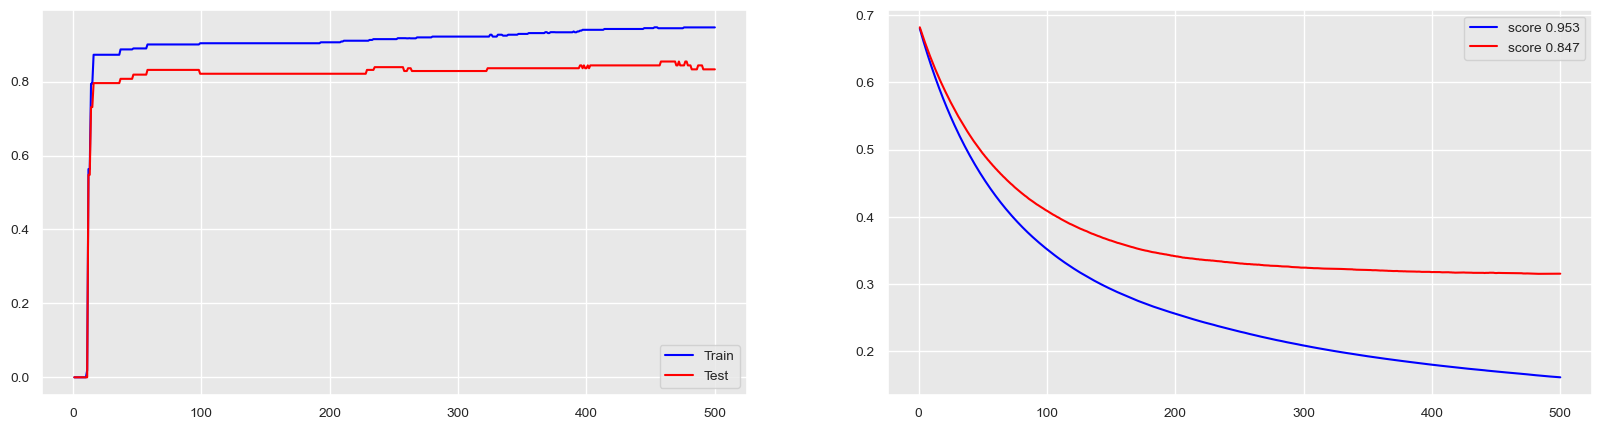

In [93]:
def plot_learnig_tree_new(estimator, X_train, X_test, y_train, y_test):  
    
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    n_estimators = estimator.n_estimators_
    zero = np.zeros(n_estimators, dtype=np.float64)
    color_one = 'blue'
    color_two = 'red'
    
    train_score = zero
    for i, y_pred_train in enumerate(estimator.staged_predict(X_train)):
        train_score[i] = f1_score(y_train, y_pred_train)
    ax1.plot(
        (np.arange(train_score.shape[0]) + 1),
        train_score,
        "-",
        color=color_one,
        label='Train',
        )
        
    test_score = zero
    for i, y_pred_test in enumerate(estimator.staged_predict(X_test)):
        train_score[i] = f1_score(y_test, y_pred_test)    
    ax1.plot(
        (np.arange(test_score.shape[0]) + 1),
        train_score,
        "-",
        color = color_two,
        label='Test',
        )
    ax1.legend(loc='best')


    train_deviance = zero
    for i, y_pred_train in enumerate(estimator.staged_predict_proba(X_train)):
        train_deviance[i] = log_loss(y_train, y_pred_train)
        
    ax2.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        '-',
        color=color_one,
        label="score "+str(round(estimator.score(X_train, y_train),3))
    )

    test_deviance = zero
    for i, y_pred_test in enumerate(estimator.staged_predict_proba(X_test)):
        test_deviance[i] = log_loss(y_test, y_pred_test)
        
    ax2.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        '-',
        color=color_two,
        label="score "+str(round(estimator.score(X_test, y_test),3))
    )
    ax2.legend(loc='best')    
    
    

clf = GradientBoostingClassifier(n_estimators=500,random_state=42)
clf.fit(X_train, y_train)
#plot_learnig_tree(clf, X_train, X_test, y_train, y_test)
plot_learnig_tree_new(clf, X_train, X_test, y_train, y_test)

clf1 = GradientBoostingClassifier(n_estimators=50,random_state=42)
clf1.fit(X_train, y_train)
clf2 = GradientBoostingClassifier(n_estimators=500,random_state=42)
clf2.fit(X_train, y_train)
print(f1_score(y_test,clf1.predict(X_test)))
print(f1_score(y_test,clf2.predict(X_test)))

clf = GradientBoostingClassifier(n_estimators=500,random_state=42, learning_rate = 0.01)
clf.fit(X_train, y_train)
#plot_learnig_tree(clf, X_train, X_test, y_train, y_test)
plot_learnig_tree_new(clf, X_train, X_test, y_train, y_test)

In [342]:
gbrt = GradientBoostingClassifier(learning_rate=0.23, subsample=0.75, min_samples_split=5, n_estimators=500,random_state=12)
gbrt.fit(X_train, y_train)
y_pred=gbrt.predict(X_test)
f1_score(y_test,y_pred)

0.8727272727272727

In [22]:
from sklearn.ensemble import StackingClassifier
clf_v1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.40891,max_iter = 4000)
clf_v2 =KNeighborsClassifier(n_neighbors = 21, p = 1, weights = 'uniform')
clf_v3 =SVC(C=9,kernel='rbf')
e_s_clf = StackingClassifier(
        estimators = [
            ('lr', clf_v1), 
            ('rf', clf_v2), 
            ('gnb', clf_v3)],
        final_estimator = GradientBoostingClassifier(learning_rate=0.23, subsample=0.75, min_samples_split=5, n_estimators=500,random_state=12),
        stack_method = 'predict'
)

e_s_clf.fit(X_train,y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=0.40891, max_iter=4000,
                                                   penalty='l1',
                                                   solver='liblinear')),
                               ('rf',
                                KNeighborsClassifier(n_neighbors=21, p=1)),
                               ('gnb', SVC(C=9))],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.23,
                                                              min_samples_split=5,
                                                              n_estimators=500,
                                                              random_state=12,
                                                              subsample=0.75),
                   stack_method='predict')

In [23]:
y_pred=e_s_clf.predict(X_test)
f1_score(y_test,y_pred)

0.8448275862068966